In [33]:
import baltic as bt

path_to_nextstrain_tree = "/Users/monclalab1/Documents/moncla/non-human-h3/auspice/nonhuman_influenza_h3nx_ha.json"
mytree, mymeta = bt.loadJSON(tree_path)



Tree height: 86.513014
Tree length: 5509.118589
annotations present

Numbers of objects in tree: 1771 (841 nodes and 930 leaves)



In [43]:
#a new lineage can be arbitrarily defined as a node with 10 leaf children with the same host
def host(mytree):
    host_switches = {}
    new_lineage = {} #this only tracks when there is node switch that produces a new subclade with at least 
    # 10 leaves (like equine --> canine); it represents a subset of host_switches
    count=0

    for k in mytree.Objects[1:]:
        if k.branchType == "node":
            if k.traits["node_attrs"]["host"]["value"] != k.parent.traits["node_attrs"]["host"]["value"]:
                switch = (k.parent.traits["node_attrs"]["host"]["value"], k.traits["node_attrs"]["host"]["value"])
                host_switches[switch] = host_switches.get(switch,0) + 1
                if len(k.leaves) >= 10:
                    new = mytree.subtree(k = k)
                    for i in new.Objects:
                        if i.branchType == "leaf":
                            if i.traits["node_attrs"]["host"]["value"] == new.root.traits["node_attrs"]["host"]["value"]:
                                count += 1
                                if count >=10:
                                    new_lineage[switch] = new_lineage.get(switch,0) + 1
                                    count=0
                                    break
        elif k.branchType == "leaf":
            if k.traits["node_attrs"]["host"]["value"] != k.parent.traits["node_attrs"]["host"]["value"]:
                switch = (k.parent.traits["node_attrs"]["host"]["value"], k.traits["node_attrs"]["host"]["value"])
                host_switches[switch] = host_switches.get(switch, 0) + 1

#this is all commented out so that it returns whats needed to graph the host switches
#this part tells you how many times you see host switches, source/new host stats, and how many times
#new lineages arise

#     counts = {}
#     total_switches=0
#     for switch, count in host_switches.items():
#         parent_host, current_host = switch
#         print(f"Switch from {parent_host} to {current_host}: {count} times")
#         if parent_host not in counts:
#             counts[parent_host] = 0
#         counts[parent_host] += count
#         total_switches += count
#     print(" ")

#     lineage_counts = {}
#     total_lineage_switches=0
#     for switch, count in new_lineage.items():
#         parent_host, current_host = switch
#         print(f"New lineages from {parent_host} to {current_host}: {count} times")
#         if parent_host not in lineage_counts:
#             lineage_counts[parent_host] = 0
#         lineage_counts[parent_host] += count
#         total_lineage_switches += count

#     print(" ")
#     for host, count in counts.items():
#         print(f"Total switches from {host}: {count}")
        
#     print("")
    
#     for host, count in lineage_counts.items():
#         print(f"New lineages from {host}: {count}")

#     print(" ")
#     print("Total host switches: " + str(total_switches))
#     print("New host lineages: " + str(total_lineage_switches))
    
    return(host_switches)


<Axes: xlabel='Switched Host', ylabel='Initial Host'>

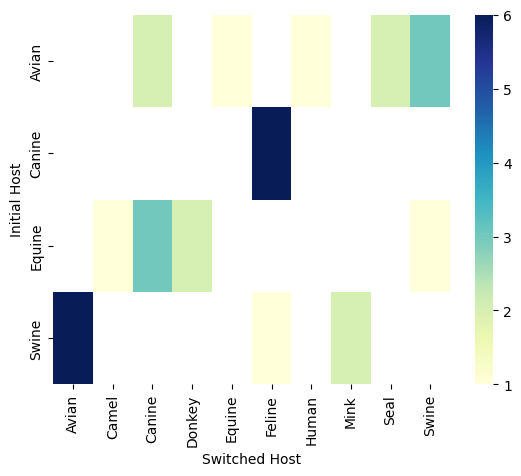

In [44]:
#heatmap showing host switches
#should update to only show upper trangle so we dont see the diagnol

data = host(mytree)
data = {key: value for key, value in data.items()}

#converting dictionary into a df
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Hosts'}, inplace=True)
df[['Initial Host', 'Switched Host']] = pd.DataFrame(df['Hosts'].tolist(), index=df.index)

#pivoting the df to get the count of switched hosts for each initial host
pivot_df = df.pivot(index='Initial Host', columns='Switched Host', values='Count')

sns.heatmap(pivot_df, cmap="YlGnBu")

In [15]:
def order(mytree):
    
    order_switches = {} #this tracks node -> node order switches as well as node --> leaf order switches
    new_lineage = {} #this only tracks when there is node switch that produces a new subclade with at least 
    # 10 leaves (like equine --> canine); it represents a subset of order_switches
    count = 0

    for k in mytree.Objects[1:]:
        if k.branchType == "node":
            if k.traits["node_attrs"]["order"]["value"] != k.parent.traits["node_attrs"]["order"]["value"]:
                switch = (k.parent.traits["node_attrs"]["order"]["value"], k.traits["node_attrs"]["order"]["value"])
                order_switches[switch] = order_switches.get(switch,0) + 1
                if len(k.leaves) >= 10:
                    new = mytree.subtree(k = k)
                    for i in new.Objects:
                        if i.branchType == "leaf" and i.traits["node_attrs"]["order"]["value"] != "Avian":
                            if i.traits["node_attrs"]["order"]["value"] == new.root.traits["node_attrs"]["order"]["value"]:
                                count += 1
                                if count >=10:
                                    new_lineage[switch] = new_lineage.get(switch,0) + 1
                                    count=0
                                    break
        elif k.branchType == "leaf":
            if k.traits["node_attrs"]["order"]["value"] != "Avian" or k.parent.traits["node_attrs"]["order"]["value"] != "Avian":
                if k.traits["node_attrs"]["order"]["value"] != k.parent.traits["node_attrs"]["order"]["value"]:
                    switch = (k.parent.traits["node_attrs"]["order"]["value"], k.traits["node_attrs"]["order"]["value"])
                    order_switches[switch] = order_switches.get(switch, 0) + 1 

    counts = {}
    total_switches=0
    for switch, count in order_switches.items():
        parent_order, current_order = switch
        # print(f"Switch from {parent_order} to {current_order}: {count} times")
        if parent_order not in counts:
            counts[parent_order] = 0
        counts[parent_order] += count
        total_switches += count

    # print(" ") 

    lineage_counts = {}
    total_lineage_switches=0
    for switch, count in new_lineage.items():
        parent_order, current_order = switch
        # print(f"New lineages from {parent_order} to {current_order}: {count} times")
        if parent_order not in lineage_counts:
            lineage_counts[parent_order] = 0
        lineage_counts[parent_order] += count
        total_lineage_switches += count

#     print(" ") 
#     for order, count in counts.items():
#         print(f"Total switches from {order}: {count}")
    
#     print("")
    
#     for key, count in lineage_counts.items():
#         print(f"New lineages from {key}: {count}")

    # print(" ")
    # print("Total order switches: " + str(total_switches))
    # print("New order lineages: " + str(total_lineage_switches))

    return(order_switches)
    


                          Hosts  Count  Initial Host Switched Host
0        (Anseriformes, Neoave)     15  Anseriformes        Neoave
1   (Anseriformes, Galliformes)     13  Anseriformes   Galliformes
2         (Anseriformes, Swine)      3  Anseriformes         Swine
3          (Anseriformes, Seal)      2  Anseriformes          Seal
4        (Neoave, Anseriformes)      2        Neoave  Anseriformes
5        (Anseriformes, Equine)      1  Anseriformes        Equine
6               (Equine, Swine)      1        Equine         Swine
7              (Equine, Canine)      3        Equine        Canine
8               (Equine, Camel)      1        Equine         Camel
9         (Swine, Anseriformes)      1         Swine  Anseriformes
10         (Swine, Galliformes)      5         Swine   Galliformes
11                (Swine, Mink)      2         Swine          Mink
12              (Swine, Feline)      1         Swine        Feline
13  (Galliformes, Anseriformes)      1   Galliformes  Anserifo

<Axes: xlabel='Switched Host', ylabel='Initial Host'>

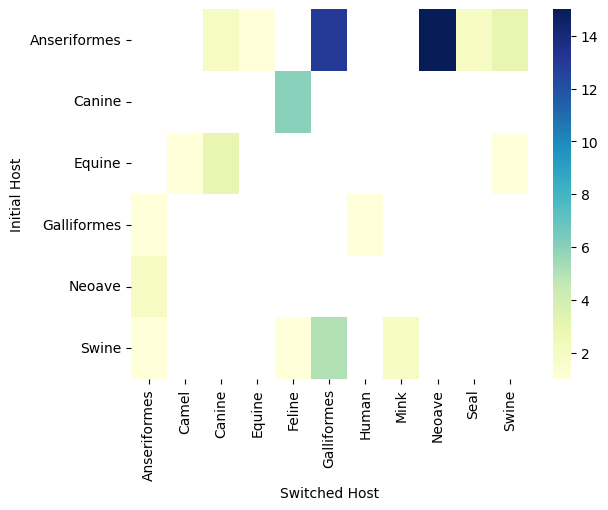

In [37]:
#heatmap showing order switches
#one day can show upper trangle so we dont see the diagnol

data= order(mytree)
data = {key: value for key, value in data.items() if 'Avian' not in key}

#converting dictionary into a df
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Hosts'}, inplace=True)
df[['Initial Host', 'Switched Host']] = pd.DataFrame(df['Hosts'].tolist(), index=df.index)

#pivoting the df to get the count of switched orders for each initial order
pivot_df = df.pivot(index='Initial Host', columns='Switched Host', values='Count')

sns.heatmap(pivot_df, cmap="YlGnBu")


In [38]:
def subtype(mytree):

    subtype_switches = {}
    new_lineage = {}
    count=0

    for k in mytree.Objects[1:]:
        if k.branchType == "node":
            if k.traits["subtype"] != k.parent.traits["subtype"]:
                switch = (k.parent.traits["subtype"], k.traits["subtype"])
                subtype_switches[switch] = subtype_switches.get(switch,0) + 1
                if len(k.leaves) >= 10:
                    new = mytree.subtree(k = k)
                    for i in new.Objects:
                        if i.branchType == "leaf" and i.traits["subtype"] != "H3":
                            if i.traits["subtype"] == new.root.traits["subtype"]:
                                count += 1
                                if count >=10:
                                    new_lineage[switch] = new_lineage.get(switch,0) + 1
                                    count=0
                                    break

        elif k.branchType == "leaf":
            if k.traits["subtype"] != "H3":
                if k.traits["subtype"] != k.parent.traits["subtype"]:
                    switch = (k.parent.traits["subtype"], k.traits["subtype"])
                    subtype_switches[switch] = subtype_switches.get(switch, 0) + 1

    # counts = {}
    # total_switches=0
    # for switch, count in subtype_switches.items():
    #     parent_subtype, current_subtype = switch
    #     print(f"Switch from {parent_subtype} to {current_subtype}: {count} times")
    #     if parent_subtype not in counts:
    #         counts[parent_subtype] = 0
    #     counts[parent_subtype] += count
    #     total_switches += count

#     print(" ") 

#     lineage_counts = {}
#     total_lineage_switches=0
#     for switch, count in new_lineage.items():
#         parent_subtype, current_subtype = switch
#         print(f"New lineages from {parent_subtype} to {current_subtype}: {count} times")
#         if current_subtype not in lineage_counts:
#             lineage_counts[current_subtype] = 0
#         lineage_counts[current_subtype] += count
#         total_lineage_switches += count

#     print(" ") 
#     for subtype, count in counts.items():
#         print(f"Total switches to {subtype}: {count}")
    
#     print("")

#     for subtype, count in lineage_counts.items():
#         print(f"New lineages from {subtype}: {count}")

#     print(" ")
#     print("Total subtype switches: " + str(total_switches))
#     print("New subtype lineages: " + str(total_lineage_switches))

    return(subtype_switches)

<Axes: xlabel='Switched Subtype', ylabel='Initial Subtype'>

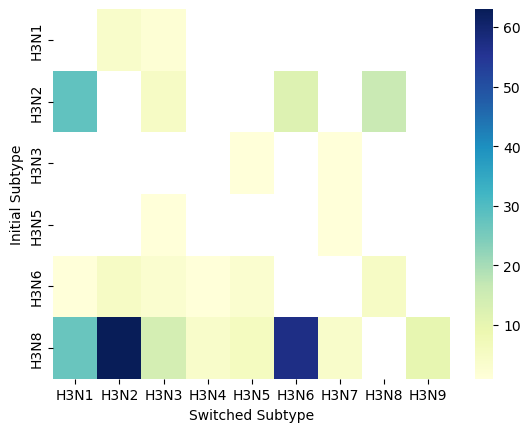

In [41]:
#heatmap showing subtype switches
#one day can show upper trangle so we dont see the diagnol

data= subtype(mytree)
data = {key: value for key, value in data.items()}

#converting dictionary into a df
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subtypes'}, inplace=True)
df[['Initial Subtype', 'Switched Subtype']] = pd.DataFrame(df['Subtypes'].tolist(), index=df.index)

pivot_df = df.pivot(index='Initial Subtype', columns='Switched Subtype', values='Count')

sns.heatmap(pivot_df, cmap="YlGnBu")